# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rifqhi Ammar Rihani
- **Email:** udaybaliya01@gmail.com
- **ID Dicoding:** qhixyz

## Menentukan Pertanyaan Bisnis

- Fluktuasi penyewa sepeda dalam dua tahun kebelakang
- Pengaruh musim (season) terhadap total jumlah penyewaan sepeda(casual)
- Korelasi antara suhu (temp) dan jumlah penyewaan sepeda (cnt)

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv("dataset/day.csv")
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [5]:
hour_df = pd.read_csv("dataset/hour.csv")
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Terdapat dua dataset yang kita import, feature dari kedua data tersebut sama persis kecuali tambahan kolom "hr" pada dataset hour_df.
- Disini kita akan fokus ke pada datase day_df untuk mengolah data perhari.

### Assessing Data

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
print("Duplikasi data untuk day_df :", day_df.duplicated().sum())

Duplikasi data untuk day_df : 0


In [8]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
print("Duplikasi data untuk hour_df :", hour_df.duplicated().sum())

Duplikasi data untuk hour_df : 0


In [11]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
- Kesalahan untuk tipedata pada dteday yang dimana merupakan objek.
- Disini kita memiliki data yang sudah bersih, dimana tidak ada missing value, inaccurate value.

### Cleaning Data

In [12]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [13]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [14]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [15]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Mengganti tipe data dari kolom dteday yang dimana objek menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore ...

In [16]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [17]:
day_df["temp"] = day_df["temp"] * 41
day_df["atemp"] = day_df["atemp"] * 50
day_df["hum"] = day_df["hum"] * 100
day_df["windspeed"] = day_df["windspeed"] * 67

In [18]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
516,517,2012-05-31,2,1,5,0,4,1,1,27.880000,31.56645,49.2917,13.083693,1100,6238,7338
347,348,2011-12-14,4,0,12,0,3,1,2,13.017500,16.91810,66.3750,4.084206,178,3562,3740
576,577,2012-07-30,3,1,7,0,1,1,1,29.964153,34.24935,66.8750,10.292339,1040,6065,7105
423,424,2012-02-28,1,1,2,0,2,1,1,14.725847,17.67625,39.5833,12.958939,229,4134,4363
723,724,2012-12-24,1,1,12,0,1,1,2,9.483464,12.94500,79.1304,5.174437,174,746,920


In [19]:
day_df.groupby(by="season").agg({
    "temp": "mean",
    "atemp": "mean",
    "hum": "mean",
    "windspeed": "mean",
    "casual": "sum"
})

,temp,atemp,hum,windspeed,casual
season,,,,,
1,12.207650,14.845697,58.290291,14.373984,60622
2,22.320611,26.015366,62.694833,13.634978,203522
3,28.958682,32.794920,63.348206,11.530366,226091
4,17.339148,20.776937,66.871917,11.523637,129782


In [24]:
day_df.groupby(by="dteday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "mean"
})

,casual,registered,cnt
dteday,,,
2011-01-01,331,654,985.0
2011-01-02,131,670,801.0
2011-01-03,120,1229,1349.0
2011-01-04,108,1454,1562.0
2011-01-05,82,1518,1600.0
...,...,...,...
2012-12-27,247,1867,2114.0
2012-12-28,644,2451,3095.0
2012-12-29,159,1182,1341.0


In [23]:
day_df.groupby(by="season").agg({
    "casual": ["min", "max"],
    "registered": ["min", "max"],
    "cnt": ["min", "max"]
})

casual       registered         cnt      
          min   max        min   max   min   max
season                                          
1           9  3155        416  5315   431  7836
2         120  3410        674  6456   795  8362
3         118  3160        889  6917  1115  8714
4           2  3031         20  6946    22  8555

**Insight:**
- Disini kita dapat melihat paling sedikit dan paling banyak penyewa aktif, pendaftar untuk setiap musim
- Disini kita mengetahui bahwa cnt merupakan gabungan antara penyewa aktif dan pendaftar
- Dapat mendapatkan informasi kelembaban, temperature di musim apa yang paling cocok untuk menyewa sepeda

## Visualization & Explanatory Analysis

### Pertanyaan 1: Fluktuasi penyewa sepeda dalam dua tahun kebelakang

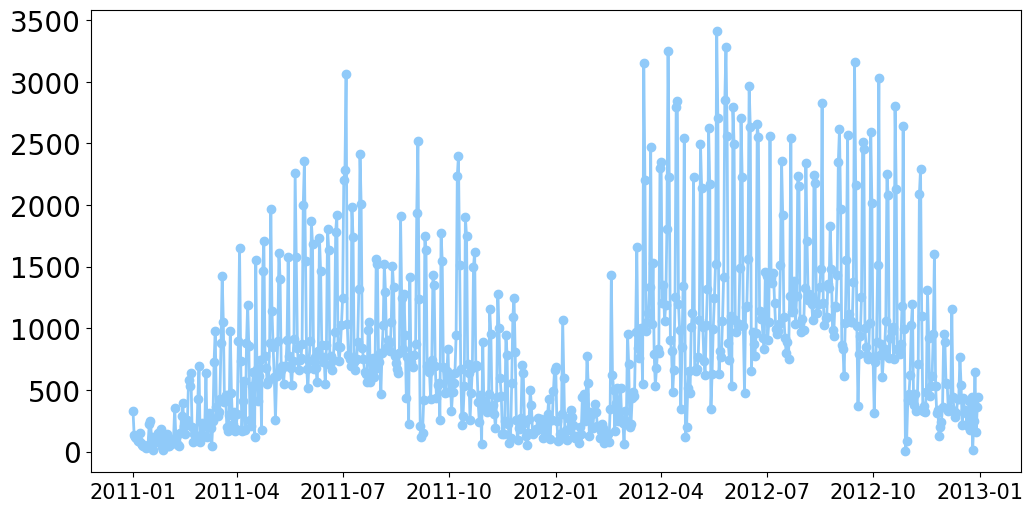

In [28]:
fig, ax = plt.subplots(figsize=(12, 6)) 

ax.plot(
    day_df["dteday"],
    day_df["casual"],
    marker="o",
    linewidth=2,
    color="#90CAF9"
)

ax.tick_params(axis="y", labelsize=20)
ax.tick_params(axis="x", labelsize=15)

plt.show()


### Pertanyaan 2: Pengaruh musim (season) terhadap total jumlah penyewaan sepeda(casual)

/var/folders/xq/qwz54m751ml_p6rl5w04k5rc0000gn/T/ipykernel_26753/775823068.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_desc', y='casual', data=user_on_season, palette='coolwarm_r')


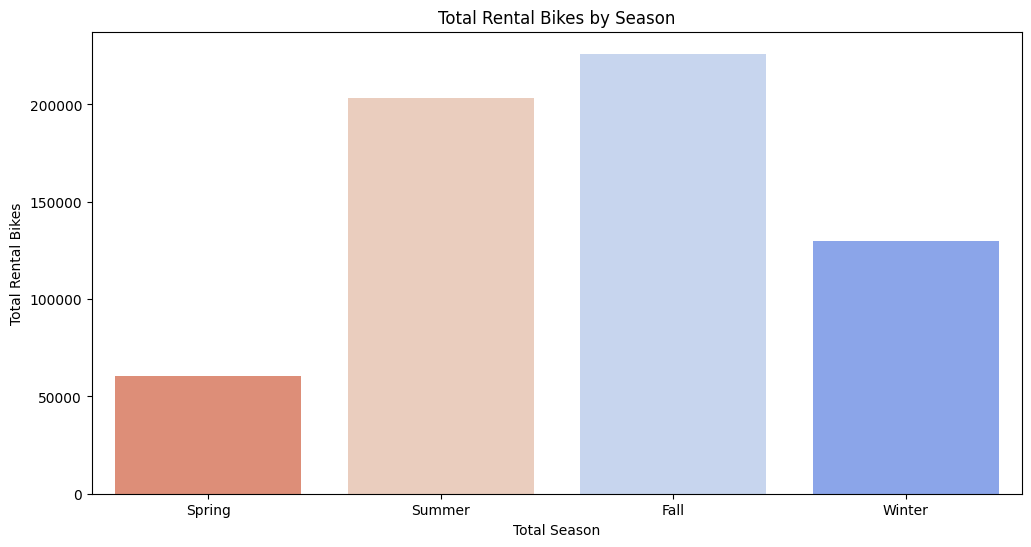

In [32]:
def create_user_on_season(df):
    user_on_season = df.groupby('season').agg({
        "casual": "sum",
        "registered": "sum",
        "cnt": "sum"
    }).reset_index()

    season_mapping = {
        1: 'Spring',
        2: 'Summer',
        3: 'Fall',
        4: 'Winter'
    }
    user_on_season['season_desc'] = user_on_season['season'].map(season_mapping)

    return user_on_season

user_on_season = create_user_on_season(day_df)

plt.figure(figsize=(12, 6))
sns.barplot(x='season_desc', y='casual', data=user_on_season, palette='coolwarm_r')
plt.title('Total Rental Bikes by Season')
plt.xlabel('Total Season')
plt.ylabel('Total Rental Bikes')
plt.show()

### Pertanyaan 3: Korelasi antara suhu (temp) dan jumlah penyewaan sepeda (cnt)

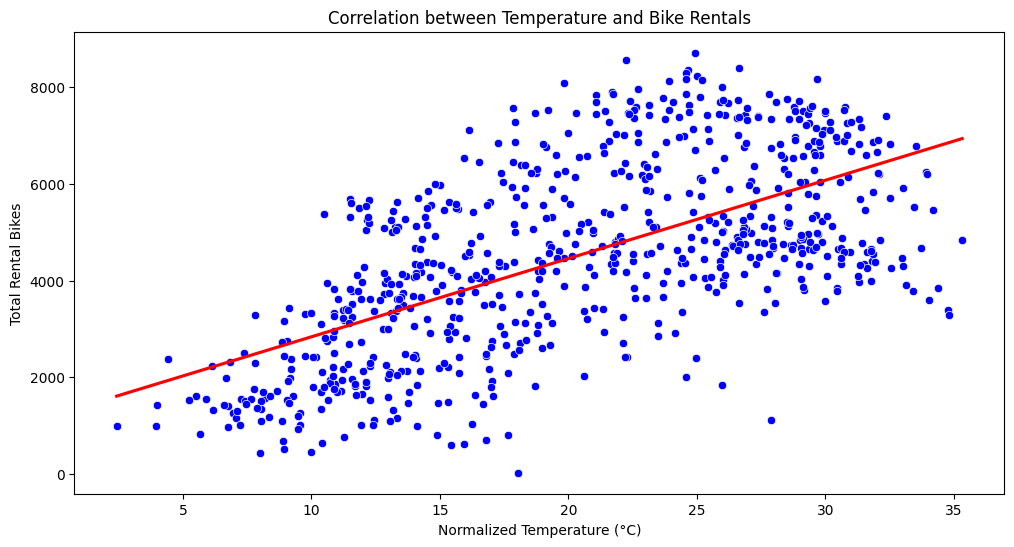

In [33]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='temp', y='cnt', data=day_df, color='blue')
sns.regplot(x='temp', y='cnt', data=day_df, scatter=False, color='red', ci=None)
plt.title('Correlation between Temperature and Bike Rentals')
plt.xlabel('Normalized Temperature (°C)')
plt.ylabel('Total Rental Bikes')
plt.show()

**Insight:**
- Menurut grafik di pertanyaan pertama di dapati bahwa penyewaan cenderung ramai di bulan ke 7 dua tahun berturut turut
- Barchar di pertanyaan kedua dapat menggambarkan musim apa yang ramai orang menyewa sepeda
- Kolerasi yang didapati dari ekplorasi hubungan antara temperature dan penyewaan sepeda ternyata berhubungan

## Conclusion

- Fluktuasi jumlah penyewa sepeda biasanya menunjukkan pola musiman. Biasanya, jumlah penyewa meningkat selama musim semi dan musim panas, sedangkan menurun pada musim gugur dan musim dingin.
- Analisis dapat menunjukkan bahwa penyewaan sepeda casual biasanya paling tinggi di musim gugur (fall) dan musim panas (summer), sementara penyewaan cenderung lebih rendah di musim dingin (winter) dan musim semi (spring).
- Biasanya, terdapat korelasi positif antara suhu dan jumlah penyewaan sepeda. Saat suhu meningkat, lebih banyak orang cenderung menyewa sepeda untuk beraktivitas di luar.
- Dapat juga ditemukan bahwa ada rentang suhu optimal di mana jumlah penyewaan sangat tinggi. Di luar rentang ini (terlalu dingin atau terlalu panas), jumlah penyewaan mungkin menurun.